#### **Materia:** Recuperación de la Información
#### **Nombre:** Byron Carpio
#### **Grupo:** GR1CC

## Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Parte 1: Construcción de la matriz término-documento y TF-IDF
### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
    * Frecuencia absoluta (TF)
    * TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
query = "perro"
query_words = query.lower().split()

vocabulario = set ()
for doc in documents:
    for word in doc.lower().strip('.').split(" "):
        vocabulario.add(word)

for word in query_words:
    vocabulario.add(word)
    
print(len(vocabulario))
print(vocabulario)

20
{'limpieza', 'del', 'limpia', 'jugaron', 'cama', 'es', 'escondió', 'estaba', 'en', 'perro', 'de', 'debajo', 'jardín', 'se', 'gato', 'y', 'cómoda', 'importante', 'el', 'la'}


In [4]:
documents[0].lower().strip('.')

'el gato se escondió debajo de la cama'

In [5]:
for doc in documents:
    for term in vocabulario:
        count = doc.lower().strip('.').count(term)
        print(term, count, documents)

limpieza 0 ['El gato se escondió debajo de la cama.', 'La cama estaba limpia y cómoda.', 'El perro y el gato jugaron en el jardín.', 'La limpieza del jardín es importante.']
del 0 ['El gato se escondió debajo de la cama.', 'La cama estaba limpia y cómoda.', 'El perro y el gato jugaron en el jardín.', 'La limpieza del jardín es importante.']
limpia 0 ['El gato se escondió debajo de la cama.', 'La cama estaba limpia y cómoda.', 'El perro y el gato jugaron en el jardín.', 'La limpieza del jardín es importante.']
jugaron 0 ['El gato se escondió debajo de la cama.', 'La cama estaba limpia y cómoda.', 'El perro y el gato jugaron en el jardín.', 'La limpieza del jardín es importante.']
cama 1 ['El gato se escondió debajo de la cama.', 'La cama estaba limpia y cómoda.', 'El perro y el gato jugaron en el jardín.', 'La limpieza del jardín es importante.']
es 1 ['El gato se escondió debajo de la cama.', 'La cama estaba limpia y cómoda.', 'El perro y el gato jugaron en el jardín.', 'La limpieza de

In [6]:
diccionario_tf = {}
i=0
for doc in documents:
    diccionario_tfd = {}
    for term in vocabulario:
        count =  doc.lower().strip('.').count(term) # no se usa el count
        diccionario_tfd[term] = count
    #print(documents, diccionario_tfd)
    diccionario_tf[i] = diccionario_tfd
    i += 1
    print(diccionario_tfd)

{'limpieza': 0, 'del': 0, 'limpia': 0, 'jugaron': 0, 'cama': 1, 'es': 1, 'escondió': 1, 'estaba': 0, 'en': 0, 'perro': 0, 'de': 2, 'debajo': 1, 'jardín': 0, 'se': 1, 'gato': 1, 'y': 0, 'cómoda': 0, 'importante': 0, 'el': 1, 'la': 1}
{'limpieza': 0, 'del': 0, 'limpia': 1, 'jugaron': 0, 'cama': 1, 'es': 1, 'escondió': 0, 'estaba': 1, 'en': 0, 'perro': 0, 'de': 0, 'debajo': 0, 'jardín': 0, 'se': 0, 'gato': 0, 'y': 1, 'cómoda': 1, 'importante': 0, 'el': 0, 'la': 1}
{'limpieza': 0, 'del': 0, 'limpia': 0, 'jugaron': 1, 'cama': 0, 'es': 0, 'escondió': 0, 'estaba': 0, 'en': 1, 'perro': 1, 'de': 0, 'debajo': 0, 'jardín': 1, 'se': 0, 'gato': 1, 'y': 1, 'cómoda': 0, 'importante': 0, 'el': 3, 'la': 0}
{'limpieza': 1, 'del': 1, 'limpia': 0, 'jugaron': 0, 'cama': 0, 'es': 1, 'escondió': 0, 'estaba': 0, 'en': 0, 'perro': 0, 'de': 1, 'debajo': 0, 'jardín': 1, 'se': 0, 'gato': 0, 'y': 0, 'cómoda': 0, 'importante': 1, 'el': 1, 'la': 1}


In [7]:
matriz = pd.DataFrame (diccionario_tf)
# Matriz Transpuesta
matriz.T

,limpieza,del,limpia,jugaron,cama,es,escondió,estaba,en,perro,de,debajo,jardín,se,gato,y,cómoda,importante,el,la
0,0,0,0,0,1,1,1,0,0,0,2,1,0,1,1,0,0,0,1,1
1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1
2,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,3,0
3,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1


In [9]:
#matriz[0]['del']
#diccionario_tf[0]['del']
matriz.to_csv("matriz_tf.csv", index=True)

In [10]:
# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d

array([[-1.07928449, -1.73739882],
       [-1.35204195,  1.83917526],
       [ 2.79812836,  0.18141402],
       [-0.36680192, -0.28319046]])

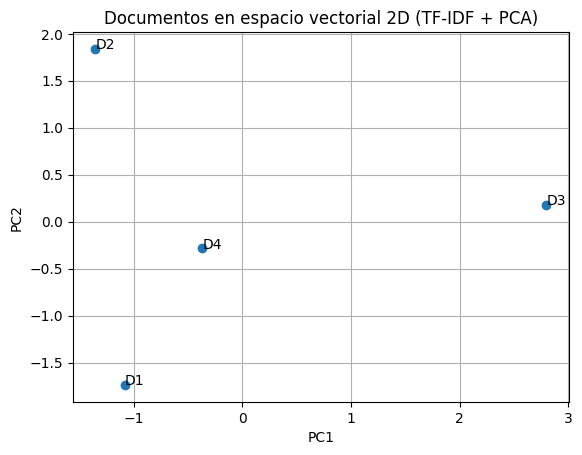

In [11]:
plt.scatter(docs_2d[:,0], docs_2d[:,1])
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

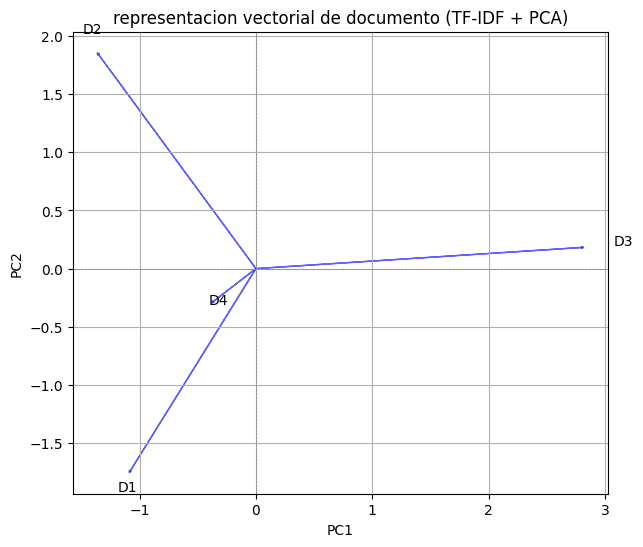

In [12]:
plt.figure(figsize=(10,6))
for i, (x,y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
    plt.text(x*1.1, y*1.1, f'D{i+1}', fontsize=10)

plt.title("representacion vectorial de documento (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

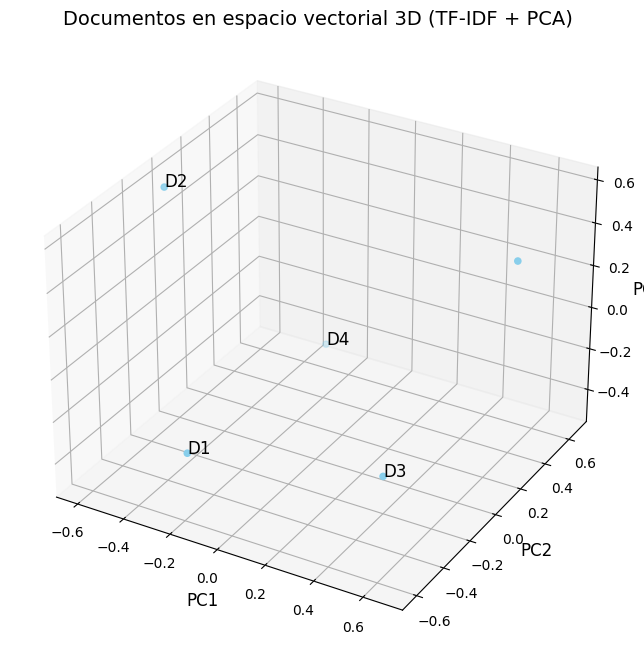

In [34]:
pca = PCA(n_components=3)
docs_3d = pca.fit_transform(tfidf_matrix.toarray()) 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Puntos 3D
ax.scatter(docs_3d[:, 0], docs_3d[:, 1], docs_3d[:, 2], color='skyblue')

# Etiquetas de documentos
etiquetas = ["D1", "D2", "D3", "D4"]
for i, txt in enumerate(etiquetas):
    ax.text(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], txt, fontsize=12)

# Títulos y ejes
ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + PCA)", fontsize=14)
ax.set_xlabel("PC1", fontsize=12)
ax.set_ylabel("PC2", fontsize=12)
ax.set_zlabel("PC3", fontsize=12)

plt.show()

## Parte 2: Representación de la consulta como vector
### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [20]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
query = "perro"
query_words = query.lower().split()

documents.append(query)

vocabulario = set ()
for doc in documents:
    for word in doc.lower().replace('.', '').split(" "):
        vocabulario.add(word)

# Agregar la palabra del query
for word in query_words:
    vocabulario.add(word)

print(len(vocabulario))
print(vocabulario)
print(len(documents))

20
{'limpieza', 'del', 'limpia', 'jugaron', 'cama', 'es', 'escondió', 'estaba', 'en', 'perro', 'de', 'debajo', 'jardín', 'se', 'gato', 'y', 'cómoda', 'importante', 'el', 'la'}
5


In [21]:
documents[4].lower().strip('.')

'perro'

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Obtener el TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
matriz = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
matriz.T


,0,1,2,3,4
cama,0.318882,0.398475,0.000000,0.000000,0.0
cómoda,0.000000,0.493899,0.000000,0.000000,0.0
de,0.395246,0.000000,0.000000,0.000000,0.0
debajo,0.395246,0.000000,0.000000,0.000000,0.0
del,0.000000,0.000000,0.000000,0.442832,0.0
el,0.318882,0.000000,0.772729,0.000000,0.0
en,0.000000,0.000000,0.319259,0.000000,0.0
es,0.000000,0.000000,0.000000,0.442832,0.0
escondió,0.395246,0.000000,0.000000,0.000000,0.0
estaba,0.000000,0.493899,0.000000,0.000000,0.0


In [26]:
similitudes = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

# Imprimir resultados
print("Similitud coseno de la consulta con cada documento:")
for i, score in enumerate(similitudes[0]):
    print(f"Consulta vs D{i+1}: {score:.4f}")

Similitud coseno de la consulta con cada documento:
Consulta vs D1: 0.0000
Consulta vs D2: 0.0000
Consulta vs D3: 0.2576
Consulta vs D4: 0.0000


In [ ]:
# Seccion 3: Construir matriz TF para documentos
diccionario_tf = {}
i = 0
for doc in documents:
    diccionario_tfd = {}
    words = doc.lower().replace('.', '').split()
    for term in vocabulario:
        diccionario_tfd[term] = words.count(term)
    diccionario_tf[i] = diccionario_tfd
    i += 1
    print(diccionario_tfd)

In [27]:
matriz.to_csv("matriz_tf2.csv", index=True)

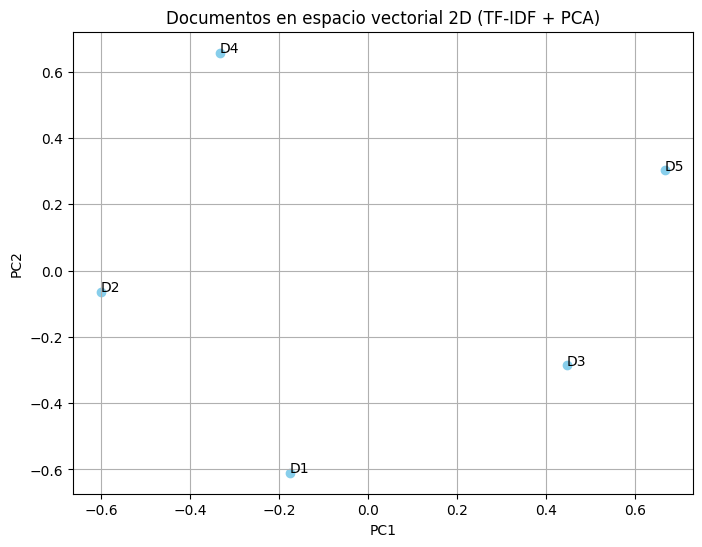

In [28]:
# Sección 3: PCA para reducir a 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(tfidf_matrix.toarray())  # docs_2d.shape = (5, 2)

# Sección 4: Gráfico
plt.figure(figsize=(8,6))
plt.scatter(docs_2d[:,0], docs_2d[:,1], color='skyblue')

# Etiquetas de documentos
etiquetas = ["D1", "D2", "D3", "D4", "D5"]
for i, txt in enumerate(etiquetas):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))

plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

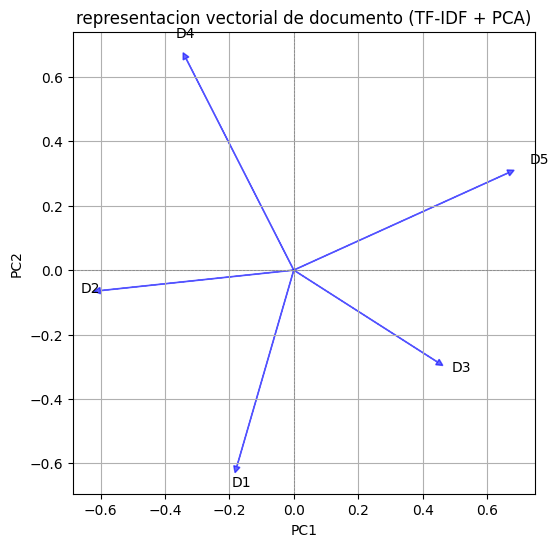

In [29]:
plt.figure(figsize=(10,6))
for i, (x,y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
    plt.text(x*1.1, y*1.1, f'D{i+1}', fontsize=10)

plt.title("representacion vectorial de documento (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Parte 3: Consulta por similitud y ranking de documentos
### Actividad

1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando plt.quiver() o plt.arrow()

In [30]:
def documentos_relevantes(tfidf_matrix, top_k=3):
    consulta_vector = tfidf_matrix[-1]      # Último vector = consulta
    docs_vectors = tfidf_matrix[:-1]         # Todos los demás son documentos
    similitudes = cosine_similarity(consulta_vector, docs_vectors)[0]
    
    # Ordenar por similitud descendente y devolver top_k
    indices_similares = sorted(enumerate(similitudes), key=lambda x: x[1], reverse=True)
    return indices_similares[:top_k]

In [31]:
# Paso 1: TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Paso 2: Usar la función
resultados = documentos_relevantes(tfidf_matrix, top_k=3)

# Paso 3: Imprimir resultados
print("Documentos más relevantes a la consulta:")
for idx, score in resultados:
    print(f"Documento D{idx+1} → Similitud: {score:.4f}")

Documentos más relevantes a la consulta:
Documento D3 → Similitud: 0.2576
Documento D1 → Similitud: 0.0000
Documento D2 → Similitud: 0.0000


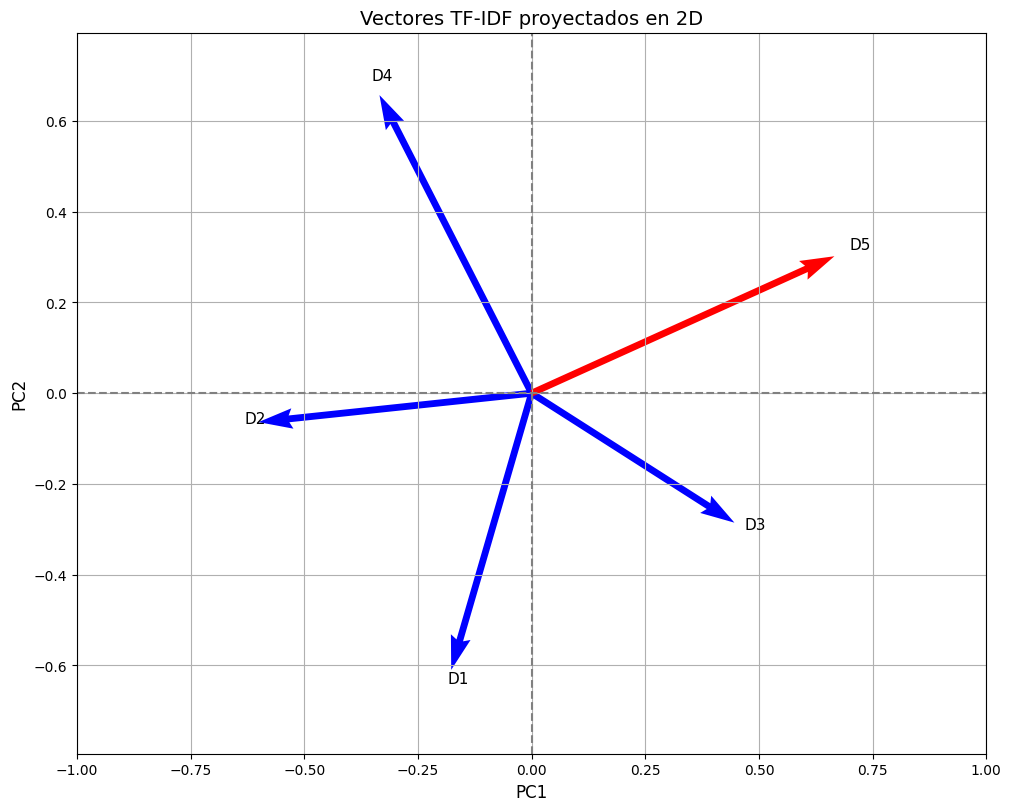

In [32]:
# Gráfico con tamaño y escala adecuada
plt.figure(figsize=(10, 8), constrained_layout=True)  # tamaño razonable

for i, vector in enumerate(docs_2d):
    color = 'red' if i == len(documents)-1 else 'blue'
    etiqueta = f"D{i+1}" if i < len(documents) - 1 else "D5"
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color)
    plt.text(vector[0]*1.05, vector[1]*1.05, etiqueta, fontsize=11)

plt.title("Vectores TF-IDF proyectados en 2D", fontsize=14)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.axis('equal')

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()
